**Data Assembly**

In this step we import all necessary dictionaries and packages, and import our CSV files. To categorize videos on the basis of which country they belong to, we create a new column called 'region'. We also drop duplicates so as to ensure we have information of videos as on their last trended date 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import collections

In [2]:
nations = ['US', 'CA', 'GB']
country = pd.DataFrame()
for nation in nations:
    df = pd.DataFrame()
    filename = f'//Users/mahimakaushiva/Desktop/Youtube/Youtube/countries/{nation}videos.csv'
    df = pd.read_csv(filename)
    videos = collections.Counter(df['title'])
#     total = len(videos)
    codes = nation
    df['trending_days'] = df['title'].map(videos)
    df = df.drop_duplicates(subset='title', keep='last')
    df['region'] = codes
    country = country.append(df)
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US
44,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US
46,ogYum4kWXgk,17.14.11,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US


In [3]:
# converting trending_date and publish_time to datetime

country['trending_date'] = pd.to_datetime(country['trending_date'],errors='coerce', format='%y.%d.%m')
country['publish_time'] = pd.to_datetime(country['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

country = country[country['trending_date'].notnull()]
country = country[country['publish_time'].notnull()]

country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US
46,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13 13:00:06,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US


In [4]:
# removing incomplete rows

country = country.dropna(how = 'any', inplace = False, axis = 0)

In [5]:
#Mapping the category codes to their respective category

category =collections.Counter({2 : 'Autos & Vehicles', 
 1 : 'Film & Animation',
10 : 'Music',
15 : 'Pets & Animals',
17 : 'Sports',
18 : 'Short Movies',
19 : 'Travel & Events',
20 : 'Gaming',
21 : 'Videoblogging',
22 : 'People & Blogs',
23 : 'Comedy',
24 : 'Entertainment',
25 : 'News & Politics',
26 : 'Howto & Style',
27 : 'Education',
28 : 'Science & Technology',
29 : 'Nonprofits & Activism',
30 : 'Movies',
31 : 'Anime/Animation',
32 : 'Action/Adventure',
33 : 'Classics',
34 : 'Comedy',
35 : 'Documentary',
36 : 'Drama',
37 : 'Family',
38 : 'Foreign',
39 : 'Horror',
40 : 'Sci-Fi/Fantasy',
41 : 'Thriller',
42 : 'Shorts',
43 : 'Shows',
44 : 'Trailers'})
category

Counter({2: 'Autos & Vehicles',
         1: 'Film & Animation',
         10: 'Music',
         15: 'Pets & Animals',
         17: 'Sports',
         18: 'Short Movies',
         19: 'Travel & Events',
         20: 'Gaming',
         21: 'Videoblogging',
         22: 'People & Blogs',
         23: 'Comedy',
         24: 'Entertainment',
         25: 'News & Politics',
         26: 'Howto & Style',
         27: 'Education',
         28: 'Science & Technology',
         29: 'Nonprofits & Activism',
         30: 'Movies',
         31: 'Anime/Animation',
         32: 'Action/Adventure',
         33: 'Classics',
         34: 'Comedy',
         35: 'Documentary',
         36: 'Drama',
         37: 'Family',
         38: 'Foreign',
         39: 'Horror',
         40: 'Sci-Fi/Fantasy',
         41: 'Thriller',
         42: 'Shorts',
         43: 'Shows',
         44: 'Trailers'})

In [6]:
country['category']=country['category_id'].map(category)
# country = country.drop(columns = ['category_id'], axis = 1)
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region,category
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US,Sports
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US,Film & Animation
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US,News & Politics
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US,People & Blogs
46,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13 13:00:06,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US,Entertainment


In [7]:
# building our df for text preprocessing

country_final = country[['channel_title', 'title', 'tags', 'description', 'category_id', 'category', 'region','trending_days', 'likes', 'dislikes', 'views']]
country_final.head()

,channel_title,title,tags,description,category_id,category,region,trending_days,likes,dislikes,views
10,NFL,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",New England Patriots returner Dion Lewis blast...,17,Sports,US,1,655,25,81377
36,Screen Junkies,TL;DW - Every DCEU Movie Before Justice League,"screenjunkies|""screen junkies""|""sj news""|""hone...",With Justice League approaching fast we rewatc...,1,Film & Animation,US,1,7515,792,288922
41,BBC News,Iraq-Iran earthquake: Deadly tremor hits borde...,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",A strong 7.2-magnitude earthquake has rattled ...,25,News & Politics,US,1,308,26,34785
44,Shawn Johnson East,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...","shawn johnson|""andrew east""|""shawn east""|""shaw...",Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,US,1,4451,1772,321053
46,People are Awesome,People are Awesome & The Pet Collective presen...,"people are awesome|""people are awesome 2017""|""...",Pets are Awesome! This is for all the animal l...,24,Entertainment,US,1,3417,33,69844


**Data Preprocessing** 

We run the data through a pipeline to remove punctuation, stop words and tokenize it

In [8]:
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess

# tokenize sentences and clean

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)
        sent = re.sub('\s+', ' ', sent)
        sent = re.sub("\'", "", sent)
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield (sent)
        
# convert to list
data = country_final.title.values.tolist()
data_words = list(sent_to_words(data)) 
print(data_words)

[['dion', 'lewis', 'yd', 'kick', 'return', 'td', 'vs', 'denver', 'cant', 'miss', 'play', 'nfl', 'wk', 'highlights'], ['tl', 'dw', 'every', 'dceu', 'movie', 'before', 'justice', 'league'], ['iraq', 'iran', 'earthquake', 'deadly', 'tremor', 'hits', 'border', 'region', 'bbc', 'news'], ['affairs', 'ex', 'boyfriends', 'million', 'net', 'worth', 'google', 'us', 'shawn', 'and', 'andrew'], ['people', 'are', 'awesome', 'the', 'pet', 'collective', 'present', 'pets', 'are', 'awesome'], ['jason', 'momoa', 'wows', 'hugh', 'grant', 'with', 'some', 'dothraki', 'the', 'graham', 'norton', 'show'], ['mayo', 'clinics', 'first', 'face', 'transplant', 'patient', 'meets', 'donor', 'family'], ['jason', 'momoa', 'lisa', 'bonet', 'love', 'at', 'first', 'sight'], ['mark', 'wahlbergs', 'kids', 'use', 'him', 'for', 'his', 'celeb', 'connections'], ['camila', 'cabello', 'havana', 'vertical', 'video', 'ft', 'young', 'thug'], ['owen', 'wilson', 'on', 'meeting', 'julia', 'roberts', 'and', 'tandem', 'biking'], ['meryl'

In [9]:
import spacy
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [10]:
# build the bigram, trigram models and lemmatizing

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!
data_ready

[['miss', 'play'],
 [],
 ['earthquake', 'deadly', 'tremor', 'hit', 'border', 'region'],
 ['boyfriend', 'net', 'worth'],
 ['people', 'awesome', 'collective', 'present', 'pet', 'awesome'],
 ['wow'],
 ['face', 'transplant', 'patient', 'meet', 'donor', 'family'],
 ['love', 'sight'],
 ['kid', 'use', 'celeb', 'connection'],
 ['vertical', 'video'],
 [],
 ['meryl_streep', 'meet', 'vogue'],
 ['country', 'music', 'edition'],
 ['thrill', 'review'],
 ['key'],
 ['live'],
 ['lyric', 'video'],
 ['meal', 'cost'],
 ['dark', 'official'],
 ['great', 'view'],
 ['drop', 'catch', 'paper', 'airplane', 'foot'],
 ['improvising',
  'style',
  'different',
  'classical',
  'composer',
  'practice',
  'note'],
 ['walk', 'water', 'official', 'music', 'video'],
 ['kiwi'],
 [],
 ['lover', 'live', 'ellen_degenere'],
 ['pick', 'girlfriend', 'outfit', 'blindfold'],
 ['college', 'oxford'],
 ['diminutive'],
 ['upset', 'uninvited'],
 ['chapter', 'baby'],
 [],
 ['genasis', 'talk', 'come', 'open', 'son', 'autism'],
 ['enter

In [11]:
# Build the topic model - we create a corpus of words using all the titles and then process the corpus to find the most
# dominant topics emerging 

# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.124*"live" + 0.065*"final" + 0.041*"perform" + 0.032*"year" + 0.026*"try" + 0.026*"find" + 0.023*"challenge" + 0.019*"light" + 0.017*"dream" + 0.016*"speak"'), (1, '0.000*"partynextdoor" + 0.000*"unbridled" + 0.000*"political" + 0.000*"grime" + 0.000*"upset" + 0.000*"forget" + 0.000*"praise" + 0.000*"quarter" + 0.000*"believe" + 0.000*"bloom"'), (2, '0.063*"story" + 0.063*"talk" + 0.060*"new" + 0.048*"season" + 0.045*"want" + 0.035*"interview" + 0.030*"performance" + 0.021*"cat" + 0.020*"tour" + 0.019*"exclusive"'), (3, '0.000*"partynextdoor" + 0.000*"unbridled" + 0.000*"political" + 0.000*"grime" + 0.000*"upset" + 0.000*"forget" + 0.000*"praise" + 0.000*"quarter" + 0.000*"believe" + 0.000*"bloom"'), (4, '0.132*"love" + 0.043*"cardi" + 0.037*"blood" + 0.030*"fall" + 0.030*"pt" + 0.028*"baby" + 0.025*"royal_wedde" + 0.019*"picture" + 0.017*"reaction" + 0.016*"draw"'), (5, '0.000*"partynextdoor" + 0.000*"unbridled" + 0.000*"political" + 0.000*"grime" + 0.000*"upset" + 0.000*"forg

In [12]:
# Identifying the dominant topic and its percent contribution in each document

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.3698,"official, video, trailer, audio, music, movie,...","[miss, play]"
1,1,0.0,0.1000,"live, final, perform, year, try, find, challen...",[]
2,2,0.0,0.3930,"live, final, perform, year, try, find, challen...","[earthquake, deadly, tremor, hit, border, region]"
3,3,9.0,0.6942,"bad, need, song, line, thing, watch, history, ...","[boyfriend, net, worth]"
4,4,7.0,0.4218,"kid, girl, fan, little, home, test, trump, hat...","[people, awesome, collective, present, pet, aw..."
5,5,8.0,0.1001,"official, video, trailer, audio, music, movie,...",[wow]
6,6,9.0,0.6169,"bad, need, song, line, thing, watch, history, ...","[face, transplant, patient, meet, donor, family]"
7,7,4.0,0.5543,"love, cardi, blood, fall, pt, baby, royal_wedd...","[love, sight]"
8,8,7.0,0.6207,"kid, girl, fan, little, home, test, trump, hat...","[kid, use, celeb, connection]"
9,9,8.0,0.3667,"official, video, trailer, audio, music, movie,...","[vertical, video]"


In [13]:
# The most representative sentence and keywords for each topic

pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8667,"live, final, perform, year, try, find, challenge, light, dream, speak","[adam, check, terrance, ferguson, injury, knock]"
1,1.0,0.1001,"partynextdoor, unbridled, political, grime, upset, forget, praise, quarter, believe, bloom","[brad_make, giardiniera, italian, pickle, relish]"
2,2.0,0.8711,"story, talk, new, season, want, interview, performance, cat, tour, exclusive","[dwyane_wade, trash, talk, stare, heat, sixer]"
3,3.0,0.1001,"partynextdoor, unbridled, political, grime, upset, forget, praise, quarter, believe, bloom","[flaxseed, cracker, food_wishe, superfood, snack, cracker, recipe]"
4,4.0,0.8973,"love, cardi, blood, fall, pt, baby, royal_wedde, picture, reaction, draw","[legality, loot, box, design, ethical, lootboxe, extra, credit]"
5,5.0,0.1001,"partynextdoor, unbridled, political, grime, upset, forget, praise, quarter, believe, bloom","[price, pace, canadien, shootout, victory]"
6,6.0,0.8714,"reveal, time, break, answer, come, heart, cry, big, question, friend","[driver, disagree, jazz, raise, money, jazz]"
7,7.0,0.8534,"kid, girl, fan, little, home, test, trump, hate, studio, secret","[seizure, virtual, reality, body, tracking, vrchat]"
8,8.0,0.8714,"official, video, trailer, audio, music, movie, lyric, ft, teaser, eurovision","[wwe, raw, highlight, night, raw, highlight]"
9,9.0,0.8709,"bad, need, song, line, thing, watch, history, tmz, explain, know","[kim_kardashian, west, fix, internet, headline, family]"


In [21]:
# # frequency distribution of word count in documents

# doc_lens = [len(d) for d in df_dominant_topic.Text]

# # Plot
# plt.figure(figsize=(16,7), dpi=160)
# plt.hist(doc_lens, bins = 100, color='navy')
# plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
# plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
# plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

# plt.gca().set(xlim=(0, 500), ylabel='Number of Documents', xlabel='Document Word Count')
# plt.tick_params(size=16)
# plt.xticks(np.linspace(0,500,9))
# plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
# plt.show()

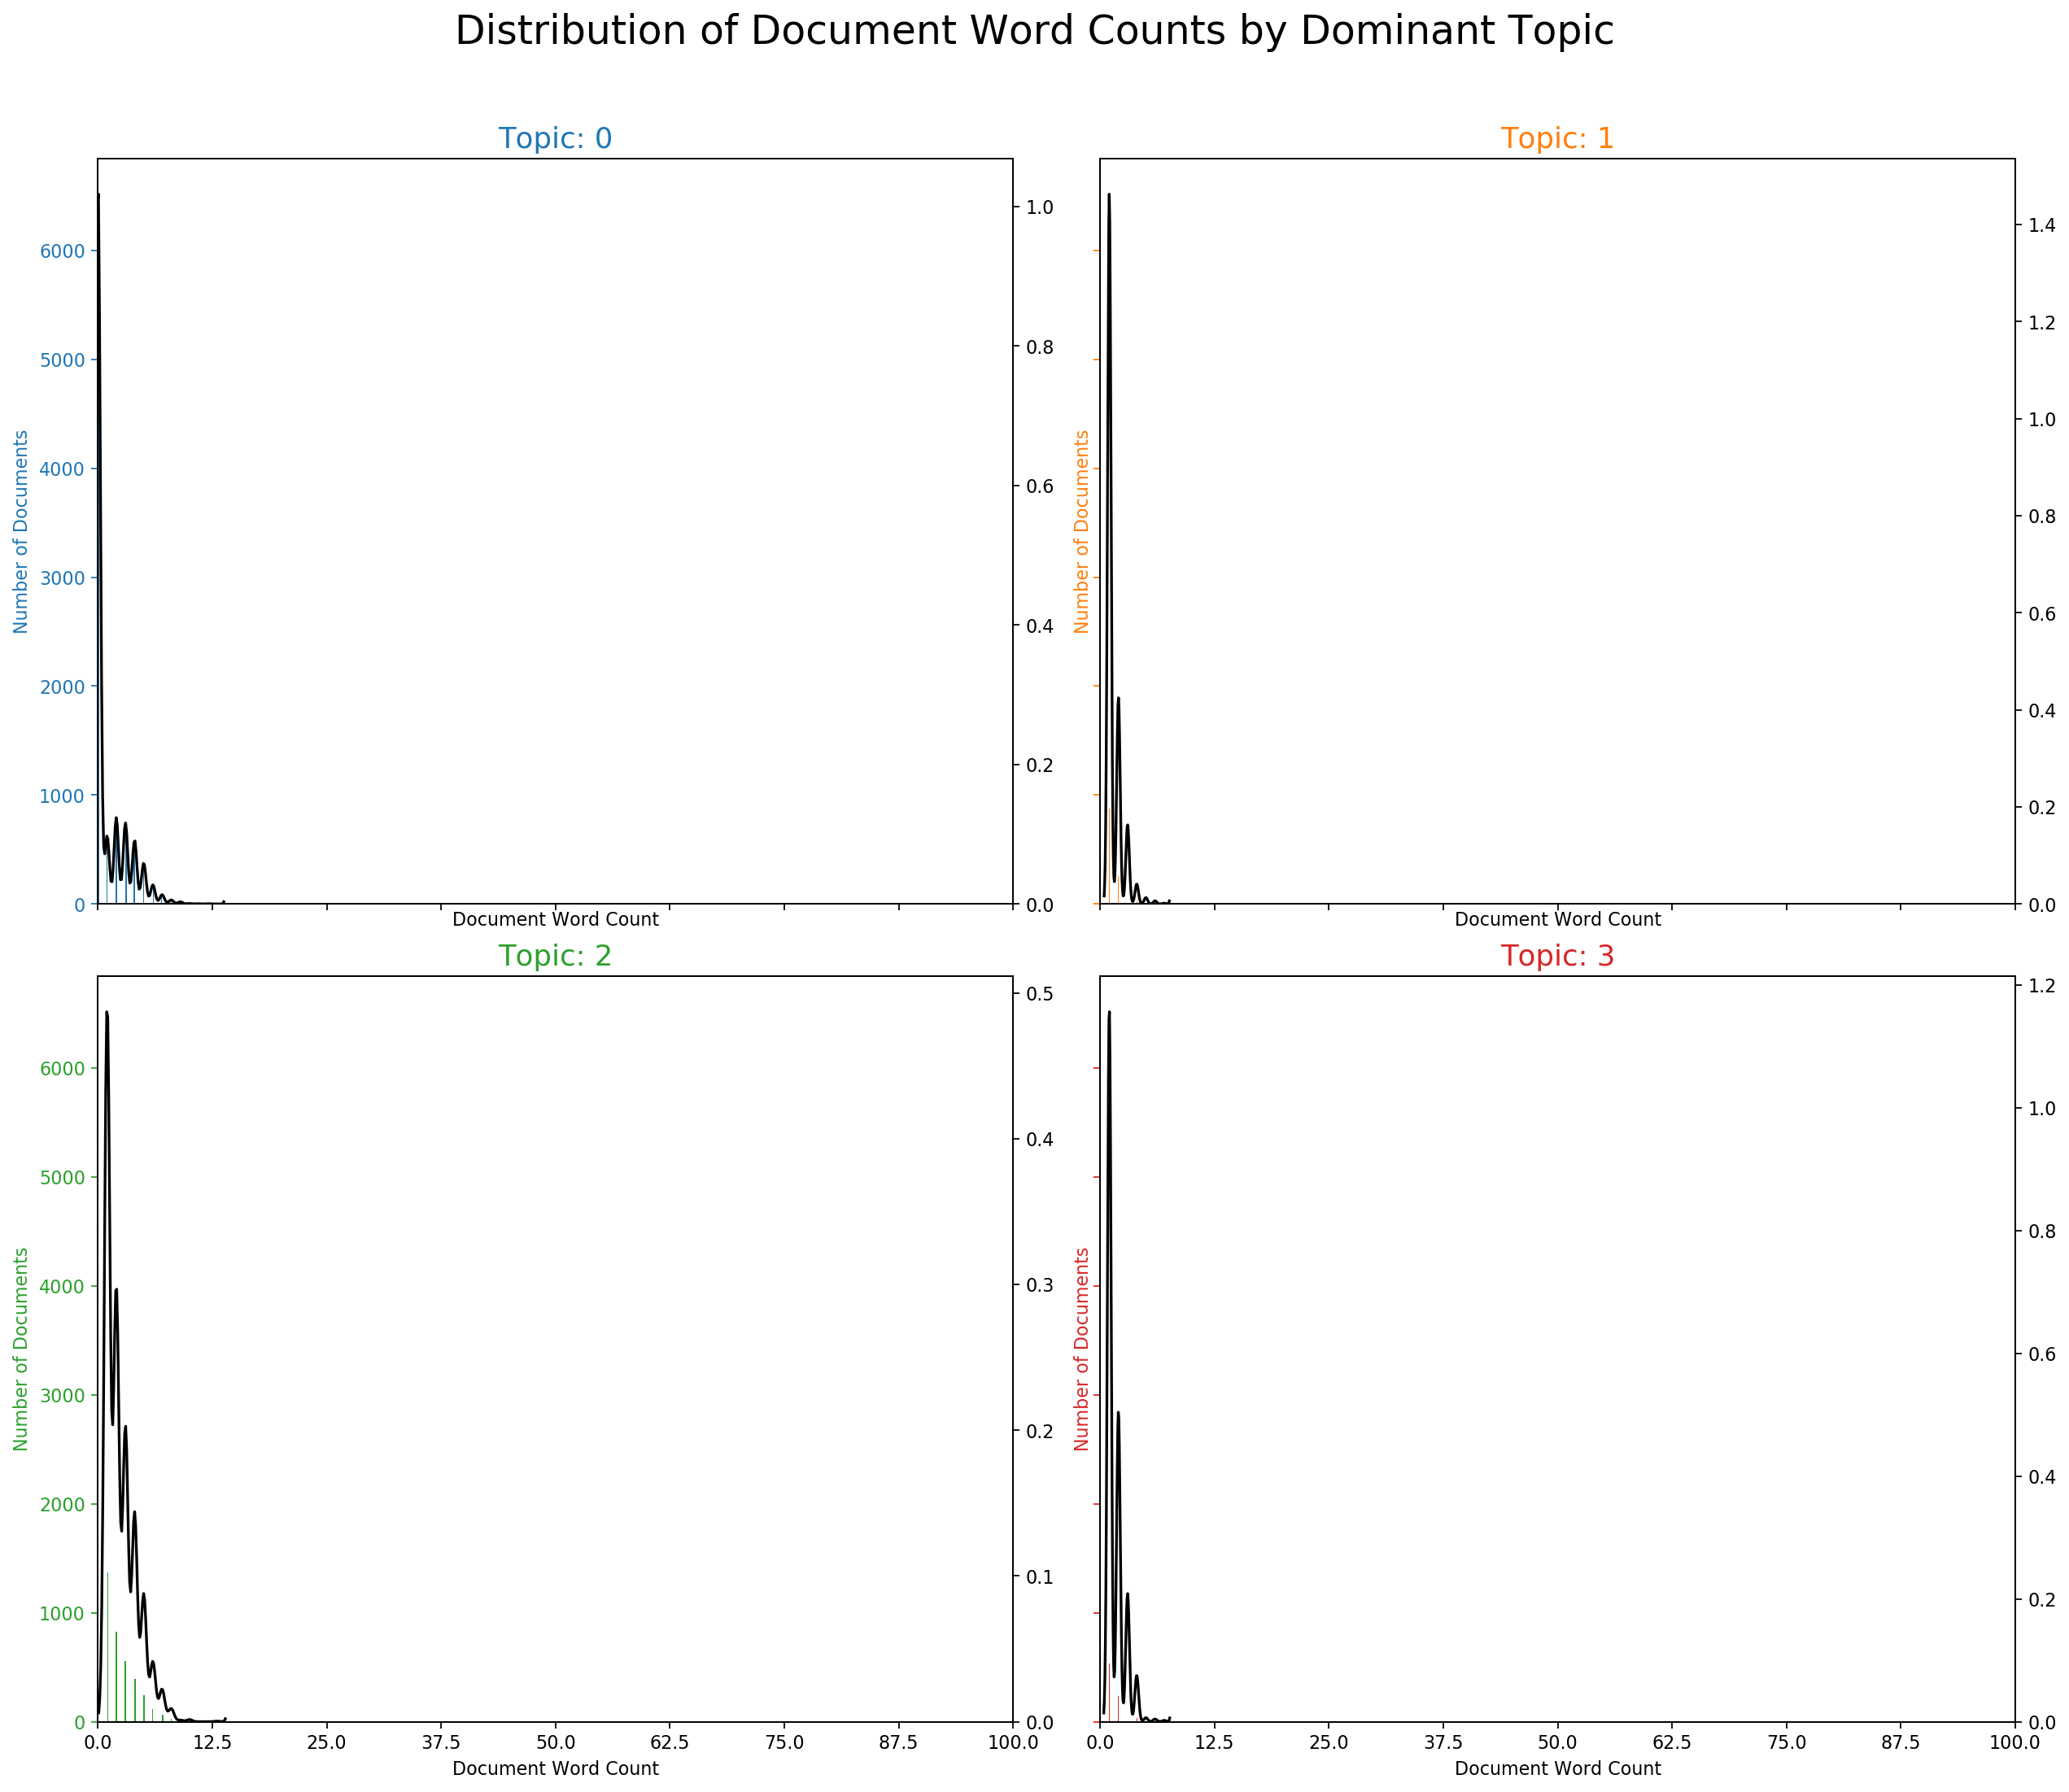

In [20]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [23]:
# # 1. Wordcloud of Top N words in each topic
# from matplotlib import pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.colors as mcolors

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# topics = lda_model.show_topics(formatted=False)

# fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     topic_words = dict(topics[i][1])
#     cloud.generate_from_frequencies(topic_words, max_font_size=300)
#     plt.gca().imshow(cloud)
#     plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
#     plt.gca().axis('off')


# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

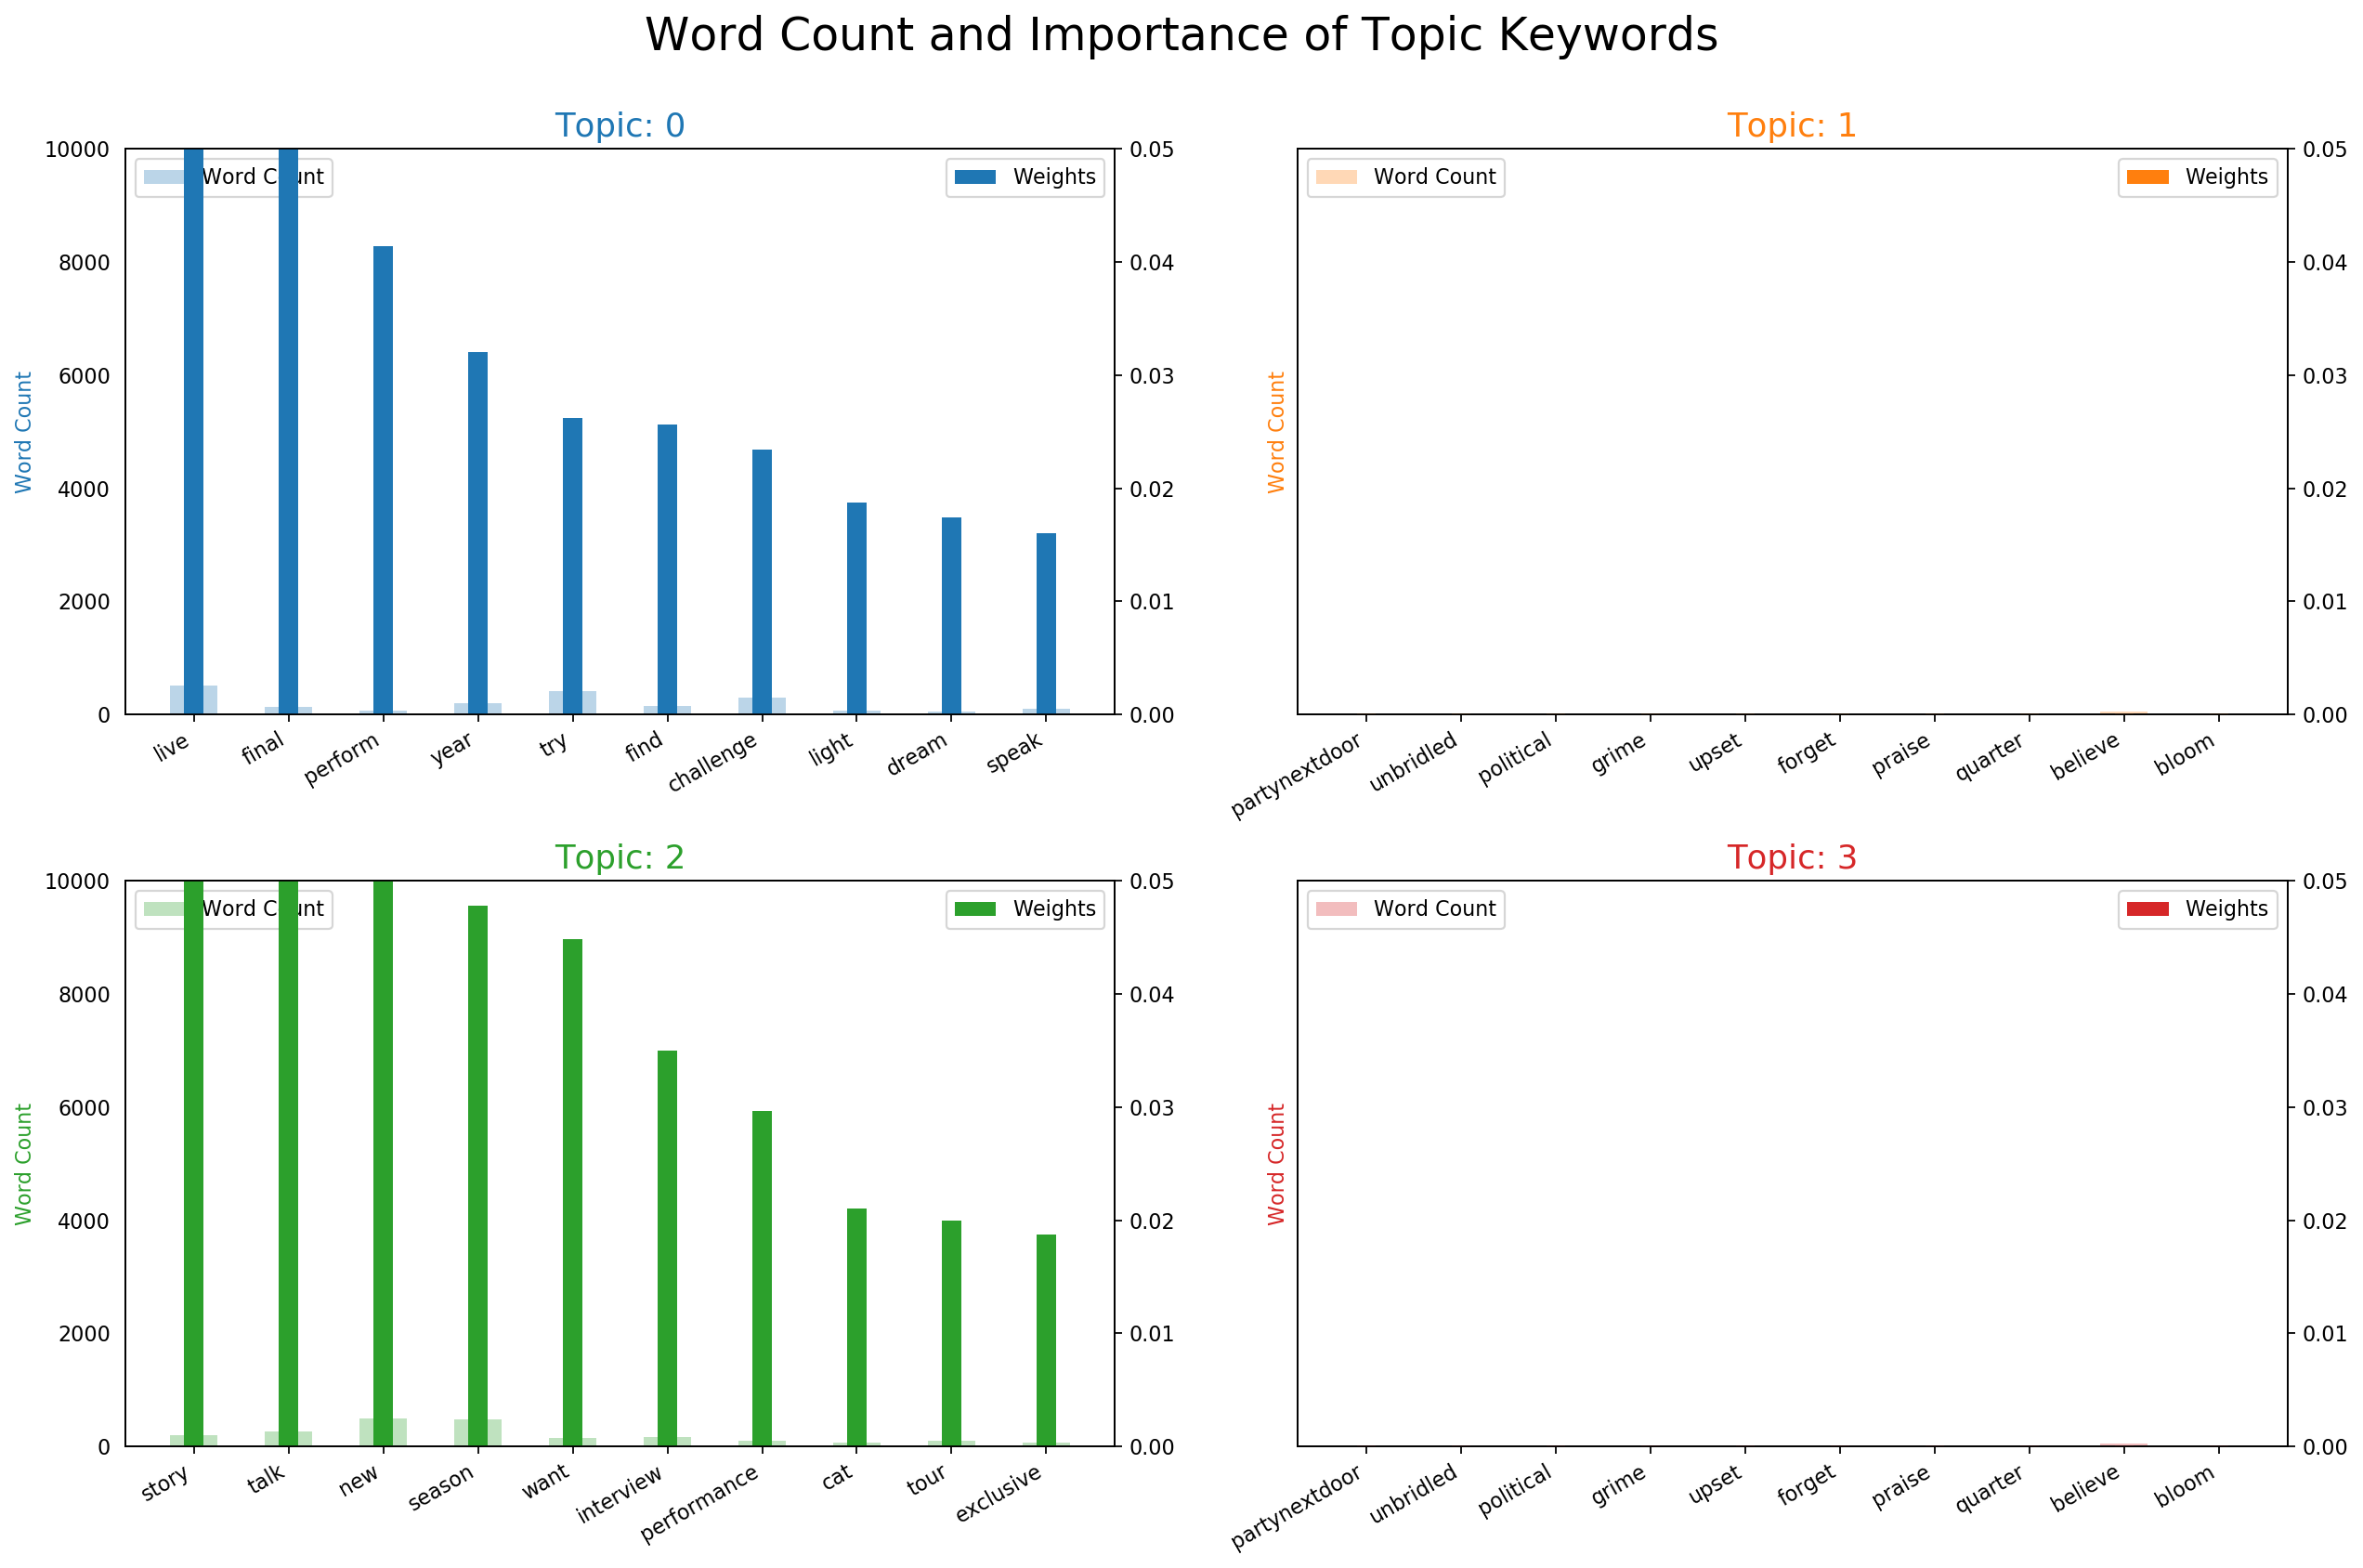

In [24]:
# word counts of topic keywords

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.050); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

IndexError: list index out of range

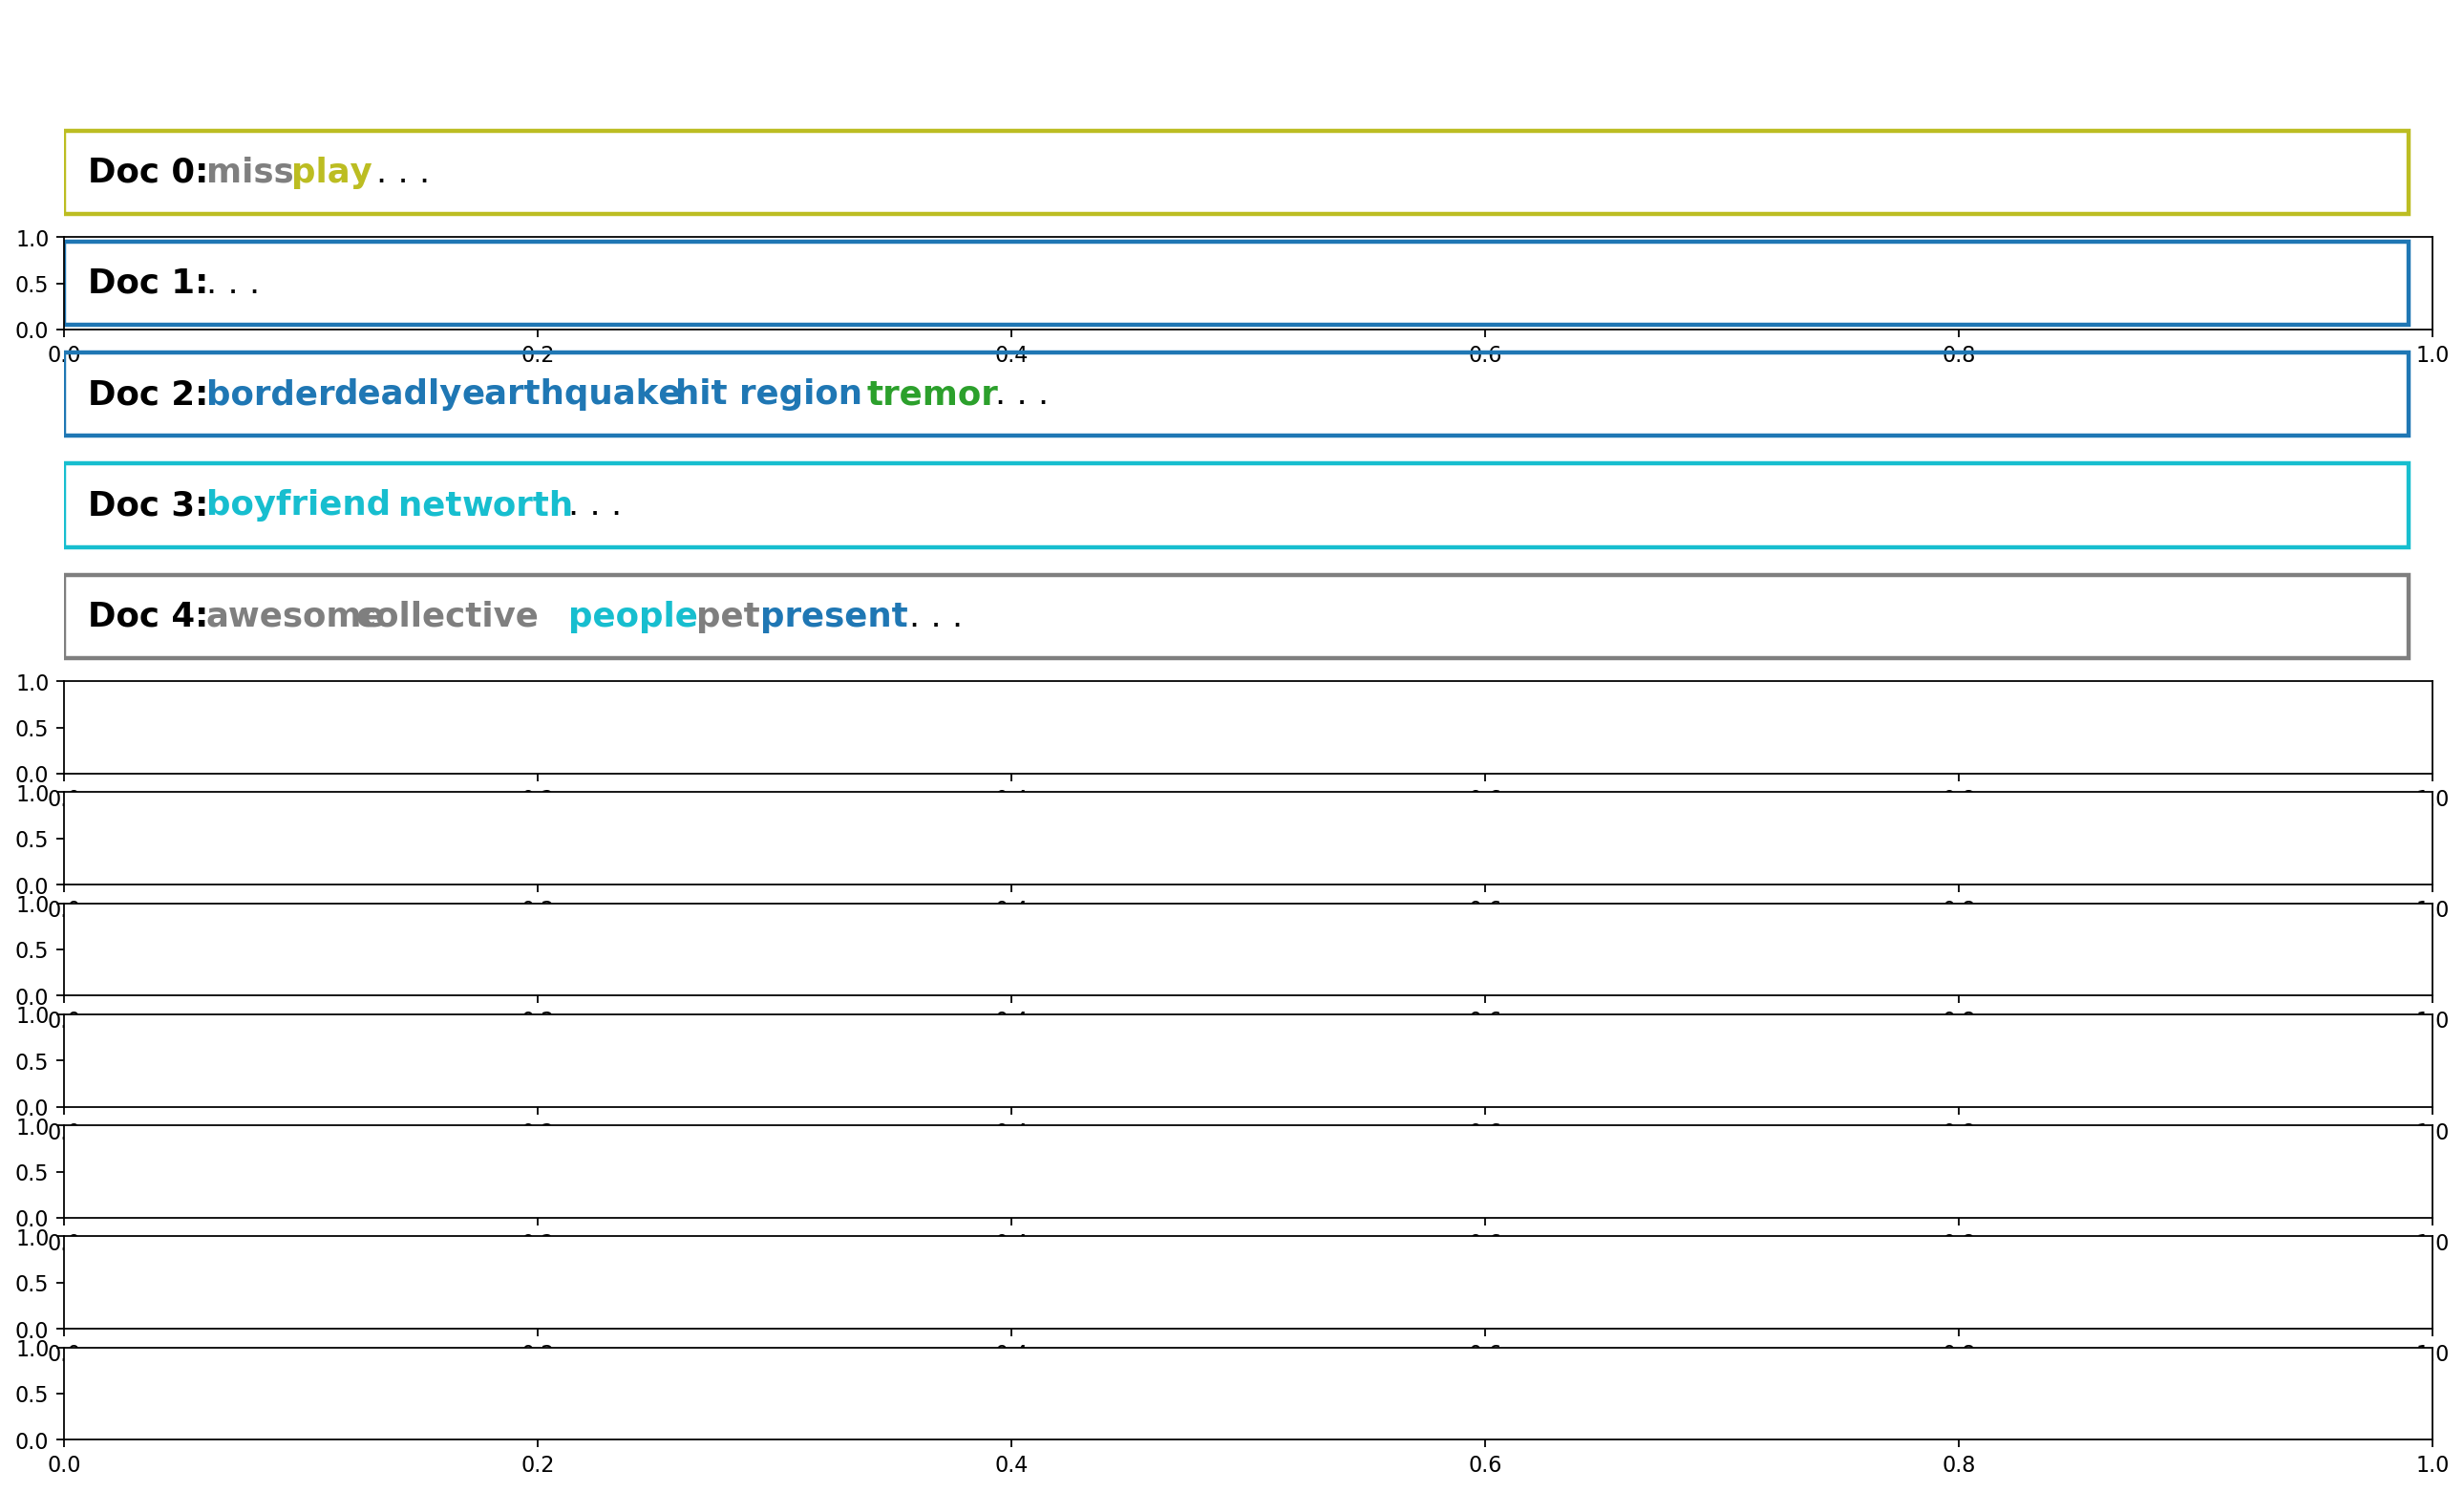

In [18]:
# sentence chart coloured by topic

# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [ ]:
# most discussed topics in the documents

# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [ ]:
# two plots

# 1. Number of documents for each topic found by assigning the document to the topic that has the most weight in the document
# 2. Number of documents for each topic by summing up the actual weight contribution of each topic to respective documents

from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
# Compute Perplexity - # a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

In [ ]:
# visualising using PyLDAvis

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
# vis

In [ ]:
import string

# text cleaning and preprocessing

# Change to lowercase
country['title'] = country['title'].map(lambda x: x.lower())

# Remove numbers
country['title'] = country['title'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
country['title']  = country['title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
country['title'] = country['title'].map(lambda x: x.strip())

# Tokenize into words
country['title'] = country['title'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
country['title'] = country['title'].map(lambda x: [word for word in x if word.isalpha()])

# filter out stop words
stop_words = set(stopwords.words('english'))
country['title'] = country['title'].map(lambda x: [w for w in x if not w in stop_words])

# Word Lemmatization
lem = WordNetLemmatizer()
country['title'] = country['title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
country['title'] = country['title'].map(lambda x: ' '.join(x))